<a href="https://colab.research.google.com/github/paulo-generozo/paulo-generozo/blob/main/SIMPLE_LINEAR_REGRESSION_WITH_NUMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Regressão Linear Simples com Python

## 📚 Introdução

A regressão linear é um dos algoritmos mais fundamentais em estatística e machine learning, usado para modelar a relação entre uma variável dependente (y) e uma ou mais variáveis independentes (X). Neste exemplo, vamos implementar uma regressão linear simples (com uma única variável preditora) do zero.

## 📚 Conceito Matemático

O modelo de regressão linear simples é representado por:


#y = β₀ + β₁*X + ε


Onde:
- `y` = variável dependente (alvo)
- `X` = variável independente (preditora)
- `β₀` = intercepto (bias)
- `β₁` = coeficiente angular
- `ε` = erro aleatório


## 🔍 Explicação Passo a Passo

1. **Geração de Dados**: Criamos dados sintéticos com uma relação linear conhecida, adicionando ruído para simular dados reais.

2. **Método dos Mínimos Quadrados**:
   - Calculamos β₁ (coeficiente angular) usando a covariância entre X e y dividida pela variância de X
   - Calculamos β₀ (intercepto) usando as médias de X e y

3. **Previsões**: A função de previsão aplica a equação linear encontrada.

4. **Visualização**: Plotamos os dados originais e a linha de regressão encontrada.

## 📈 Saída Esperada

O código irá mostrar:
- Um gráfico com os pontos de dados e a linha de regressão ajustada
- A equação da reta no formato y = β₀ + β₁X

## 💡 Aprendizados

1. A regressão linear modela relações lineares entre variáveis
2. O método dos mínimos quadrados minimiza a soma dos erros quadrados
3. β₀ representa o valor esperado de y quando X é zero
4. β₁ representa a mudança em y para cada unidade de mudança em X

## 🚀 Extensões Possíveis

1. Implementar regressão linear múltipla
2. Adicionar métricas de avaliação (R², MSE)
3. Implementar gradiente descendente para estimar os parâmetros
4. Comparar com a implementação do scikit-learn

Este exemplo fornece uma base sólida para entender como a regressão linear funciona internamente antes de usar implementações de bibliotecas como scikit-learn.

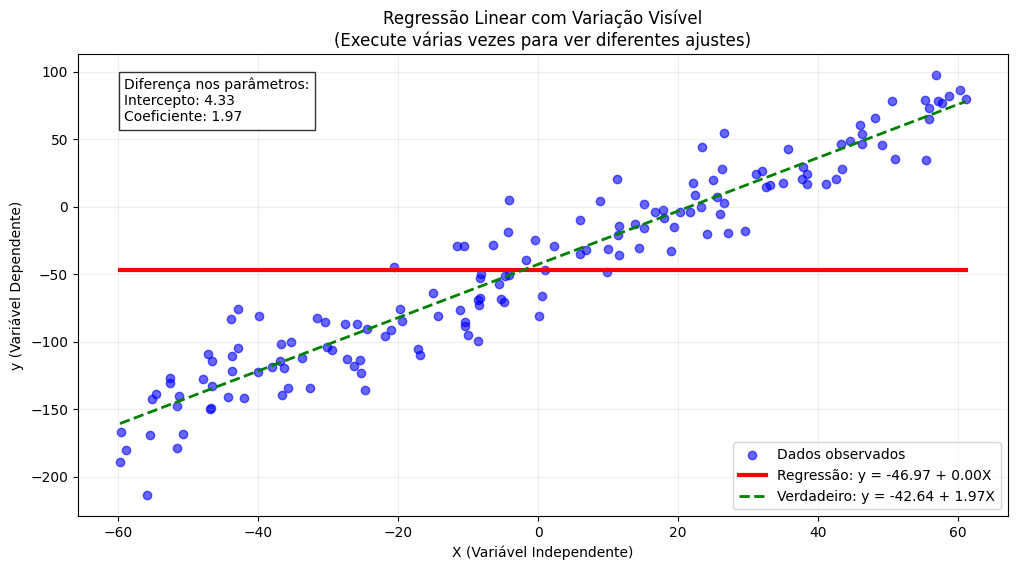

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Função para gerar dados aleatórios com variação mais ampla
def generate_random_linear_data(n_samples=100):
    """Gera dados com parâmetros mais diversos para melhor visualização"""
    # Gera X com amplitude variável
    X_amplitude = np.random.uniform(50, 200)
    X = np.random.uniform(-X_amplitude, X_amplitude, size=n_samples)

    # Gera parâmetros com maior variação
    true_beta_1 = np.random.uniform(-10, 10)
    true_beta_0 = np.random.uniform(-100, 100)

    noise = np.random.normal(0, X_amplitude/3, size=n_samples)
    y = true_beta_0 + true_beta_1 * X + noise

    return X.reshape(-1, 1), y, true_beta_0, true_beta_1

# 2. Classe do modelo (mesma implementação anterior)
class SimpleLinearRegression:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, y):
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        self.beta_1 = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
        self.beta_0 = y_mean - self.beta_1 * X_mean

    def predict(self, X):
        return self.beta_0 + self.beta_1 * X

# 3. Gerar dados e ajustar modelo
X, y, true_beta_0, true_beta_1 = generate_random_linear_data(n_samples=150)
model = SimpleLinearRegression()
model.fit(X, y)

# 4. Visualização com ajustes para melhor contraste
plt.figure(figsize=(12, 6))

# Dados originais com cores por densidade
plt.scatter(X, y, c='blue', alpha=0.6, label='Dados observados')

# Linhas com maior espessura e estilo diferenciado
x_vals = np.array([np.min(X), np.max(X)])
plt.plot(x_vals, model.predict(x_vals), 'r-', linewidth=3,
         label=f'Regressão: y = {model.beta_0:.2f} + {model.beta_1:.2f}X')
plt.plot(x_vals, true_beta_0 + true_beta_1 * x_vals, 'g--', linewidth=2,
         label=f'Verdadeiro: y = {true_beta_0:.2f} + {true_beta_1:.2f}X')

plt.title('Regressão Linear com Variação Visível\n(Execute várias vezes para ver diferentes ajustes)')
plt.xlabel('X (Variável Independente)')
plt.ylabel('y (Variável Dependente)')
plt.legend()
plt.grid(True, alpha=0.2)

# Destacar diferenças nos parâmetros
param_text = (f"Diferença nos parâmetros:\n"
              f"Intercepto: {abs(model.beta_0 - true_beta_0):.2f}\n"
              f"Coeficiente: {abs(model.beta_1 - true_beta_1):.2f}")
plt.text(0.05, 0.95, param_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.show()